## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dataset

##### Alterem o diretório abaixo para o local onde estiver os seus dados (se estiver em sua máquina local)
##### Importante: o 'r' antes do diretório para saber que é uma "raw string"

In [2]:
#Importando preços 
url1 = 'https://drive.google.com/file/d/1WAbTdLmhm0Ih971SU3AY_RoXpfPJAMTi/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_price1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1J7oWaSGJVSiTl5TifTEgvbg0d08iSryf/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_price2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1qXDbN6ib9HO5oFbI3MtdvTfXP066hYZ6/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_price3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/1tgdpfFtl1DVczTouPUDc5tLcAbh7SpWP/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_price4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1NxHF52tEXTqbglY-14_WpLsDEnYHBnuK/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_price5 = pd.read_csv(path5)

df_price = pd.concat([df_price1, df_price2, df_price3, df_price4, df_price5], ignore_index=True)

In [3]:
#Importando Vendas 
url1 = 'https://drive.google.com/file/d/1sKG9E753lvXJPB5l3RktNct71J-xh_8w/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_sales1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1u0A_yubzWjWTWLFVrm7asWs395BQ578E/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_sales2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1NlRLGEEeUxlPDpt2FgrVvjiT_y_jHluh/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_sales3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/13gowR6492BQrfQvU5_kYE5xxF3gWum38/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_sales4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1FsYLisvlMXxMz6BeUu1-1iuumVaYb9J-/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_sales5 = pd.read_csv(path5)

url6 = 'https://drive.google.com/file/d/14AbgBUnbixFjv_8pPlUkchxFQ4kytgsb/view?usp=drive_link'
path6 = 'https://drive.google.com/uc?export=download&id='+url6.split('/')[-2]
df_sales6 = pd.read_csv(path6)

df_sales = pd.concat([df_sales1, df_sales2, df_sales3, df_sales4, df_sales5, df_sales6], ignore_index=True)

In [4]:
# df_events = pd.read_csv('daily_calendar_with_events.csv')

# Importando eventos
url = 'https://drive.google.com/file/d/1h94avu15TuiguEiwdKhzL06EBNkcmSjv/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_events = pd.read_csv(path)

#### Tratando o preço para ficar em semana

In [5]:
df_price.head()


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [6]:
# Conferindo se a quantidade de semanas no df_price bate com a quantidade de dias no df_sales
distinct_yearweek=len(pd.unique(df_price['yearweek']))
print(distinct_yearweek)
print(1913/distinct_yearweek)

280
6.832142857142857


In [7]:
#Retira onde Yearweek for NaN (isso depois pode ser ajustado depois usando a média)
df_price_no_nan = df_price.dropna(subset=['yearweek'])
# Converter a coluna para string para facilitar a separação
df_price_no_nan['yearweek_char'] = df_price_no_nan['yearweek'].astype(str)

# Separar ano e semana
df_price_no_nan['year'] = df_price_no_nan['yearweek_char'].str[:4].astype(int)
df_price_no_nan['week'] = df_price_no_nan['yearweek_char'].str[4:6].astype(int)

df_price_no_nan

C:\Users\ermura\AppData\Local\Temp\ipykernel_14892\916990719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_no_nan['yearweek_char'] = df_price_no_nan['yearweek'].astype(str)
C:\Users\ermura\AppData\Local\Temp\ipykernel_14892\916990719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_no_nan['year'] = df_price_no_nan['yearweek_char'].str[:4].astype(int)
C:\Users\ermura\AppData\Local\Temp\ipykernel_14892\916990719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,item,category,store_code,yearweek,sell_price,yearweek_char,year,week
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414,201328.0,2013,28
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414,201329.0,2013,29
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858,201330.0,2013,30
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858,201331.0,2013,31
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858,201332.0,2013,32
...,...,...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201613.0,1.2000,201613.0,2016,13
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201614.0,1.2000,201614.0,2016,14
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201615.0,1.2000,201615.0,2016,15
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201616.0,1.2000,201616.0,2016,16


In [8]:
df_price_no_nan.sort_values(by='week')

,item,category,store_code,yearweek,sell_price,yearweek_char,year,week
6254236,SUPERMARKET_3_816,SUPERMARKET,PHI_2,201500.0,0.2400,201500.0,2015,0
1862397,SUPERMARKET_2_337,SUPERMARKET,NYC_3,201300.0,7.5360,201300.0,2013,0
388181,SUPERMARKET_1_051,SUPERMARKET,NYC_1,201600.0,4.6440,201600.0,2016,0
1226575,SUPERMARKET_3_217,SUPERMARKET,NYC_2,201300.0,3.5760,201300.0,2013,0
4128371,SUPERMARKET_3_579,SUPERMARKET,BOS_2,201600.0,2.3760,201600.0,2016,0
...,...,...,...,...,...,...,...,...
2943180,HOME_&_GARDEN_1_241,HOME_&_GARDEN,BOS_1,201253.0,9.9250,201253.0,2012,53
6449941,HOME_&_GARDEN_1_279,HOME_&_GARDEN,PHI_3,201253.0,1.2125,201253.0,2012,53
361157,HOME_&_GARDEN_2_457,HOME_&_GARDEN,NYC_1,201253.0,8.0875,201253.0,2012,53
3834370,HOME_&_GARDEN_2_466,HOME_&_GARDEN,BOS_2,201253.0,8.7125,201253.0,2012,53


In [9]:
#Retirando colunas que não são mais necessárias
df_price_clean = df_price_no_nan.drop(columns=['yearweek','yearweek_char'])
df_price_clean

,item,category,store_code,sell_price,year,week
0,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,2013,28
1,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,2013,29
2,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,2013,30
3,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,2013,31
4,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,2013,32
...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,2016,13
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,2016,14
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,2016,15
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,2016,16


In [10]:
#Precos medios por produto. Podemos juntar com o dataset sales depois
df_mean_prices = pd.DataFrame(df_price.groupby(['item','store_code'])['sell_price'].mean().reset_index())
df_mean_prices.rename(columns={'sell_price':'sell_price_mean'}, inplace=True)
df_mean_prices

,item,store_code,sell_price_mean
0,ACCESORIES_1_001,BOS_1,10.969366
1,ACCESORIES_1_001,BOS_2,10.997126
2,ACCESORIES_1_001,BOS_3,11.072293
3,ACCESORIES_1_001,NYC_1,11.019346
4,ACCESORIES_1_001,NYC_2,10.997126
...,...,...,...
30485,SUPERMARKET_3_827,NYC_3,1.200000
30486,SUPERMARKET_3_827,NYC_4,1.200000
30487,SUPERMARKET_3_827,PHI_1,1.200000
30488,SUPERMARKET_3_827,PHI_2,1.200000


In [11]:
#Renomeando a coluna d para days do df_events
df_events.rename(columns={'d':'day'}, inplace=True)
#Mudando o tipo da coluna date de objeto para data
df_events['date'] = pd.to_datetime(df_events['date'], format='%Y-%m-%d')
print(df_events.columns)

Index(['date', 'weekday', 'weekday_int', 'day', 'event'], dtype='object')


In [12]:
#Transpose da df_sales para que colunas virem linhas
sales_melted = df_sales.melt(id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], var_name='day', value_name='units_sold')
sales_melted

,id,item,category,department,store,store_code,region,day,units_sold
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1
58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3


In [13]:
#merge entre sales e events
df_sales_daily = sales_melted.merge(df_events, how='left', on='day')
df_sales_daily['year'] = df_sales_daily['date'].dt.year
df_sales_daily['week'] = df_sales_daily['date'].dt.isocalendar().week

In [14]:
#merge entre df anterior e mean_prices
df_01 = df_sales_daily.merge(df_price_clean, how='left', on=['item','store_code','year','week'])
df = df_01.merge(df_mean_prices, how='left', on=['item','store_code'])
df.head(10)

,id,item,category_x,department,store,store_code,region,day,units_sold,date,weekday,weekday_int,event,year,week,category_y,sell_price,sell_price_mean
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,11.019346
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,5.280100
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,3.950100
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,6.022636
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,3.909906
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,1.316759
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,10.487208
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,0.633580
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,2.347288
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,NaN,3.964929


In [15]:
#Verificando o shape antes e depois
print(df_sales_daily.shape)
print(df_01.shape)
print(df.shape)

(58327370, 15)
(58327370, 17)
(58327370, 18)


In [16]:
#Se o sell_price for NaN, repor pela média
df['sell_price'].fillna(df['sell_price_mean'], inplace=True)
df.drop(columns=['sell_price_mean'], inplace=True)
df

C:\Users\ermura\AppData\Local\Temp\ipykernel_14892\673401096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sell_price'].fillna(df['sell_price_mean'], inplace=True)


,id,item,category_x,department,store,store_code,region,day,units_sold,date,weekday,weekday_int,event,year,week,category_y,sell_price
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,11.019346
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,5.280100
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,3.950100
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,6.022636
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,3.909906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,3.576000
58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,2.976000
58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,4.776000
58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,1.536000


In [17]:
#criando uma coluna com o total sale por item diaraimente
df['total_sale'] = df['units_sold'] * df['sell_price']
df

,id,item,category_x,department,store,store_code,region,day,units_sold,date,weekday,weekday_int,event,year,week,category_y,sell_price,total_sale
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,11.019346,0.000
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,5.280100,0.000
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,3.950100,0.000
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,6.022636,0.000
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,4,NaN,3.909906,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,3.576000,3.576
58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,2.976000,0.000
58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,4.776000,0.000
58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,1.536000,4.608


In [18]:
#Retirando onde units_sold = 'NaN' para reduzir o tempo de processamento das agregações
df_remove_0 = df.loc[df['units_sold'] != 0]
print(df_remove_0.shape)
df_remove_0

(18550276, 18)


,id,item,category_x,department,store,store_code,region,day,units_sold,date,weekday,weekday_int,event,year,week,category_y,sell_price,total_sale
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,2011,4,NaN,0.633580,7.602966
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,2011,4,NaN,2.347288,4.694576
14,ACCESORIES_1_015_NYC_1,ACCESORIES_1_015,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,4,2011-01-29,Saturday,1,NaN,2011,4,NaN,0.939712,3.758849
15,ACCESORIES_1_016_NYC_1,ACCESORIES_1_016,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,5,2011-01-29,Saturday,1,NaN,2011,4,NaN,0.939712,4.698561
21,ACCESORIES_1_022_NYC_1,ACCESORIES_1_022,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,2011,4,NaN,9.499722,18.999444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327361,SUPERMARKET_3_819_PHI_3,SUPERMARKET_3_819,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,2,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,2.376000,4.752000
58327362,SUPERMARKET_3_820_PHI_3,SUPERMARKET_3_820,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,2.376000,2.376000
58327364,SUPERMARKET_3_822_PHI_3,SUPERMARKET_3_822,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,4.776000,4.776000
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,16,SUPERMARKET,3.576000,3.576000


In [19]:
#### Preços Médios ####
#Precos medios por produto
df_item_price = pd.DataFrame(df_price_clean.groupby(['item'])['sell_price'].mean().reset_index())
df_item_price.rename(columns={'sell_price': 'mean_sell_price'}, inplace=True)
#Precos médios por produto x semana
df_item_x_week = pd.DataFrame(df_price_clean.groupby(['item','week'])['sell_price'].mean().reset_index())
#Merge com o dataframe anterior e calculando a % de diferença
df_item_price_compare = pd.merge(df_item_price, df_item_x_week, on='item')
df_item_price_compare['sell_price_diff'] = df_item_price_compare['sell_price']/df_item_price_compare['mean_sell_price']
print(df_item_price_compare)

#Precos medios por loja
df_store_price = pd.DataFrame(df_price_clean.groupby(['store_code'])['sell_price'].mean().reset_index())
df_store_price.rename(columns={'sell_price': 'mean_sell_price'}, inplace=True)
#Precos médios por loja x semana
df_store_x_week = pd.DataFrame(df_price_clean.groupby(['store_code','week'])['sell_price'].mean().reset_index())
#Merge com o dataframe anterior e calculando a % de diferença
df_store_price_compare = pd.merge(df_store_price, df_store_x_week, on='store_code')
df_store_price_compare['sell_price_diff'] = df_store_price_compare['sell_price']/df_store_price_compare['mean_sell_price']
print(df_store_price_compare)


#### Agrupamentos ####
#Venda por produto x semana
df_sold_item_x_week = pd.DataFrame(df_remove_0.groupby(['item','week'])['units_sold'].sum().reset_index())
print(df_sold_item_x_week.shape)

#Venda por loja x semana
df_sold_store_x_week = pd.DataFrame(df_remove_0.groupby(['store_code','week'])['units_sold'].sum().reset_index())
print(df_sold_store_x_week.shape)

#Venda e preço médio por loja e produto
df_sold_store_x_item = df_remove_0.groupby(['store_code', 'item']).agg({'units_sold': 'sum','sell_price': 'mean'}).reset_index()
print(df_sold_store_x_item.shape)

                     item  mean_sell_price  week  sell_price  sell_price_diff
0        ACCESORIES_1_001        11.032755     0    11.01772         0.998637
1        ACCESORIES_1_001        11.032755     1    11.01772         0.998637
2        ACCESORIES_1_001        11.032755     2    11.01772         0.998637
3        ACCESORIES_1_001        11.032755     3    11.01772         0.998637
4        ACCESORIES_1_001        11.032755     4    11.01772         0.998637
...                   ...              ...   ...         ...              ...
163901  SUPERMARKET_3_827         1.199395    48     1.20000         1.000505
163902  SUPERMARKET_3_827         1.199395    49     1.20000         1.000505
163903  SUPERMARKET_3_827         1.199395    50     1.20000         1.000505
163904  SUPERMARKET_3_827         1.199395    51     1.20000         1.000505
163905  SUPERMARKET_3_827         1.199395    52     1.20000         1.000505

[163906 rows x 5 columns]
    store_code  mean_sell_price  week

In [20]:
#Venda e preço médio por loja e produto
df_sold_store_x_item = df_remove_0.groupby(['store_code', 'department']).agg({
    'units_sold': 'sum',
    'sell_price': 'mean'
    }).reset_index()
print(df_sold_store_x_item)

   store_code       department  units_sold  sell_price
0       BOS_1     ACCESORIES_1      386024    7.396616
1       BOS_1     ACCESORIES_2       43060    3.357846
2       BOS_1  HOME_&_GARDEN_1     1145836    5.607286
3       BOS_1  HOME_&_GARDEN_2      242163    6.448428
4       BOS_1    SUPERMARKET_1      365656    3.612285
..        ...              ...         ...         ...
65      PHI_3  HOME_&_GARDEN_1     1017626    5.505616
66      PHI_3  HOME_&_GARDEN_2      212808    6.210954
67      PHI_3    SUPERMARKET_1      398825    3.456651
68      PHI_3    SUPERMARKET_2      811498    4.486642
69      PHI_3    SUPERMARKET_3     3520357    3.178846

[70 rows x 4 columns]


In [35]:
df_sold_week_x_depart = df_remove_0.groupby(['department','week']).agg({
    'units_sold': 'sum',
    'total_sale': 'sum',
    'sell_price': 'mean'
    }).reset_index()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_sold_store_x_item_enc['item']= le.fit_transform(df_sold_store_x_item_enc['item'])
# df_sold_store_x_item_enc['store_code']= le.fit_transform(df_sold_store_x_item_enc['store_code'])

df_sold_week_x_depart

,department,week,units_sold,total_sale,sell_price
0,ACCESORIES_1,1,102351,5.541565e+05,7.730823
1,ACCESORIES_1,2,96219,5.284270e+05,7.765051
2,ACCESORIES_1,3,97859,5.369615e+05,7.741594
3,ACCESORIES_1,4,111617,5.679967e+05,7.459462
4,ACCESORIES_1,5,128337,6.353821e+05,7.466978
...,...,...,...,...,...
366,SUPERMARKET_3,49,592804,1.564859e+06,3.268888
367,SUPERMARKET_3,50,578595,1.560683e+06,3.298566
368,SUPERMARKET_3,51,548463,1.497552e+06,3.302563
369,SUPERMARKET_3,52,486260,1.297455e+06,3.251548


In [34]:
df_sold_week_x_store = df_remove_0.groupby(['item']).agg({
    'units_sold': 'sum',
    'total_sale': 'sum',
    'sell_price': 'mean'
    }).reset_index()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_sold_store_x_item_enc['item']= le.fit_transform(df_sold_store_x_item_enc['item'])
# df_sold_store_x_item_enc['store_code']= le.fit_transform(df_sold_store_x_item_enc['store_code'])

df_sold_week_x_store

,item,units_sold,total_sale,sell_price
0,ACCESORIES_1_001,4093,45022.744368,11.001805
1,ACCESORIES_1_002,5059,26702.798303,5.277776
2,ACCESORIES_1_003,1435,5652.256656,3.943266
3,ACCESORIES_1_004,39175,235359.480395,5.990894
4,ACCESORIES_1_005,14621,55665.118681,3.820442
...,...,...,...,...
3044,SUPERMARKET_3_823,15388,50901.044988,3.319614
3045,SUPERMARKET_3_824,8325,25412.784878,3.037876
3046,SUPERMARKET_3_825,13526,65806.485183,4.872210
3047,SUPERMARKET_3_826,12188,18719.750118,1.535882


#### EDA

In [23]:
from src.heatmap import heatmap

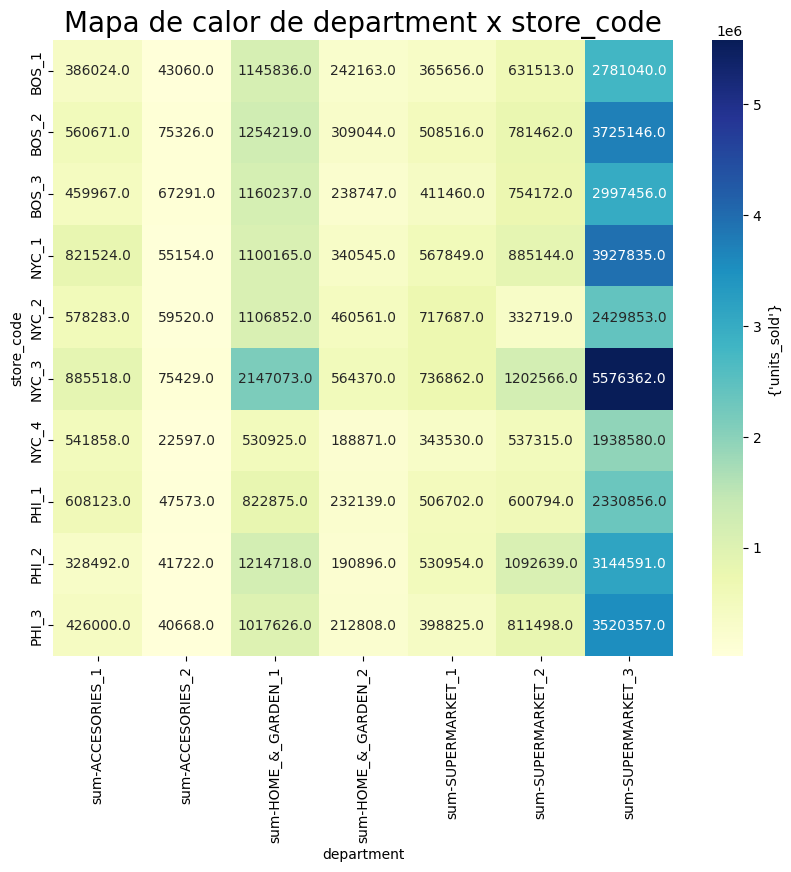

In [24]:
heatmap(df_var=df_remove_0, x_var='department', y_var='store_code', target='units_sold',agg='sum')

### Clustering

In [25]:
from src.scatterplot import scatter_plot2D
from src.elbowmethod import elbowmethod
from src.kmeans import kmeans_clust
from src.agglomerative import agglomerative_clust
from src.dendograma import dendograma

#### Clustering do preço

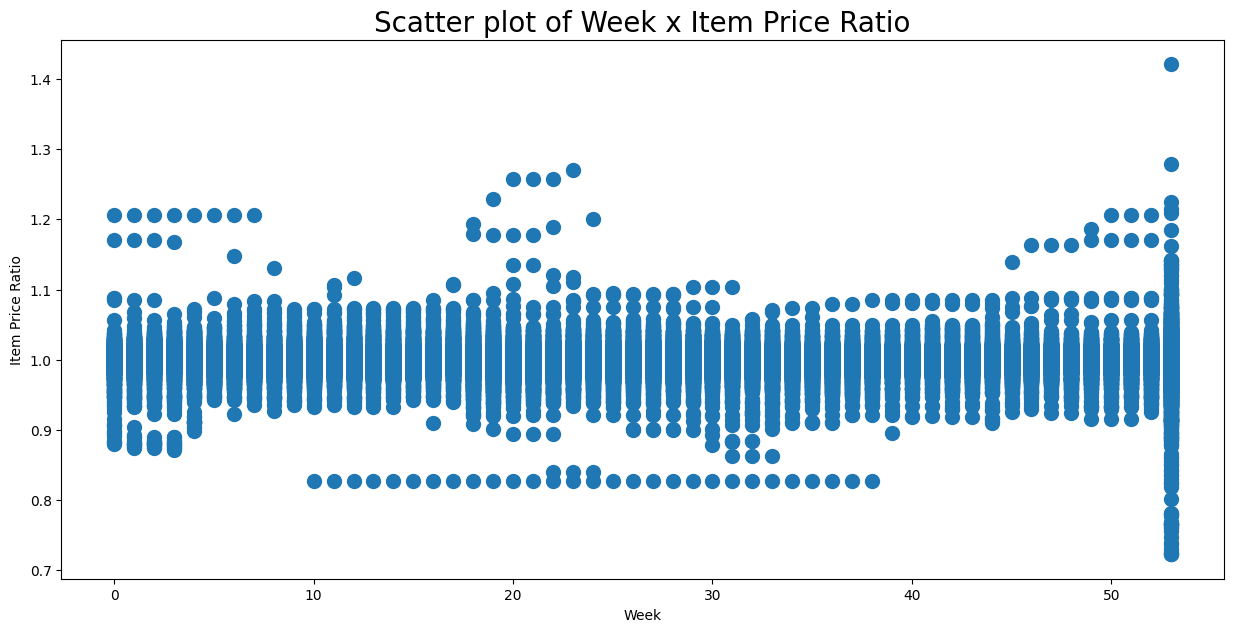

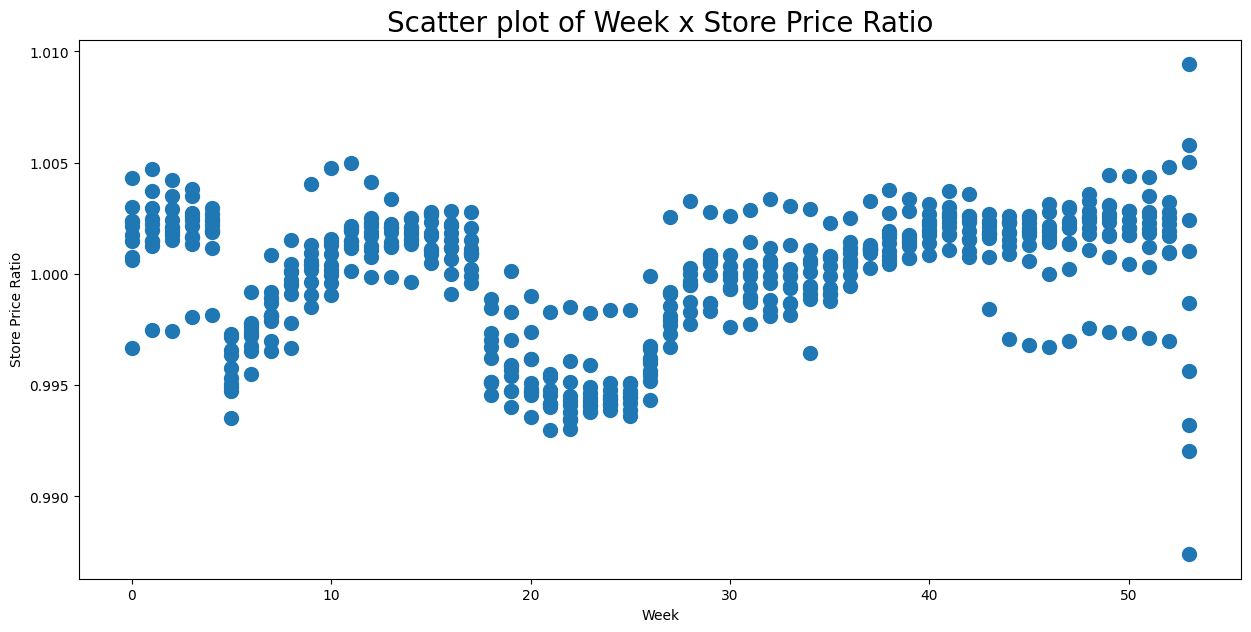

In [26]:
scatter_plot2D(df_var=df_item_price_compare, 
               x_var='week', 
               y_var='sell_price_diff', 
               x_label='Week', 
               y_label='Item Price Ratio')

scatter_plot2D(df_var=df_store_price_compare, 
               x_var='week', 
               y_var='sell_price_diff', 
               x_label='Week', 
               y_label='Store Price Ratio')


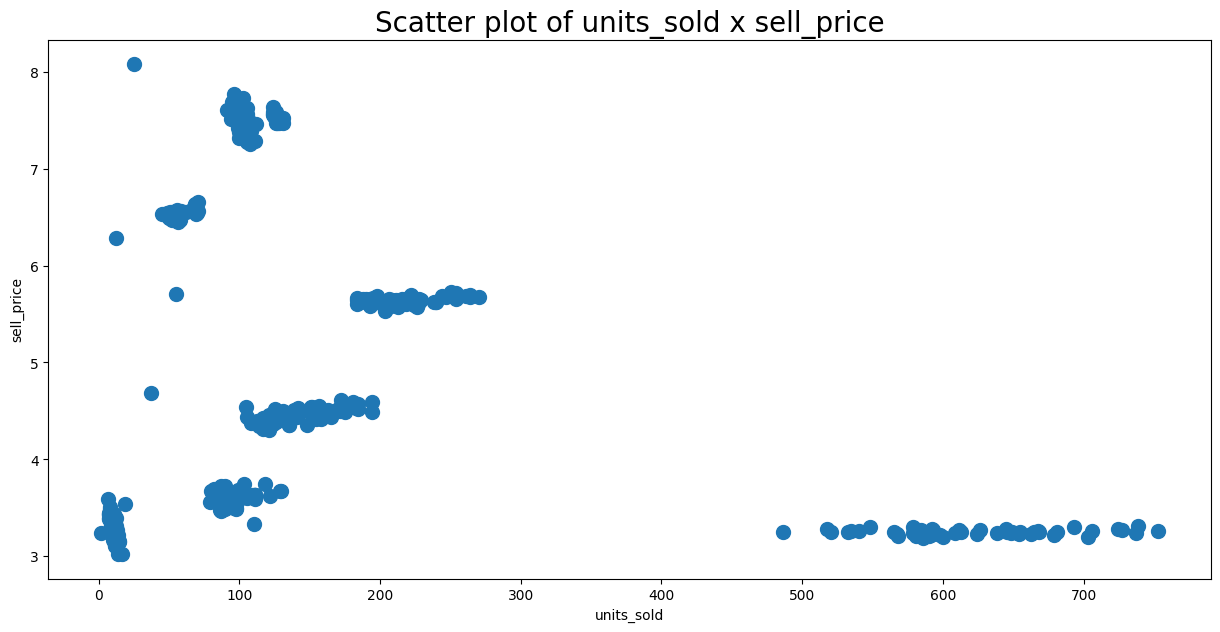

C:\Users\ermura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


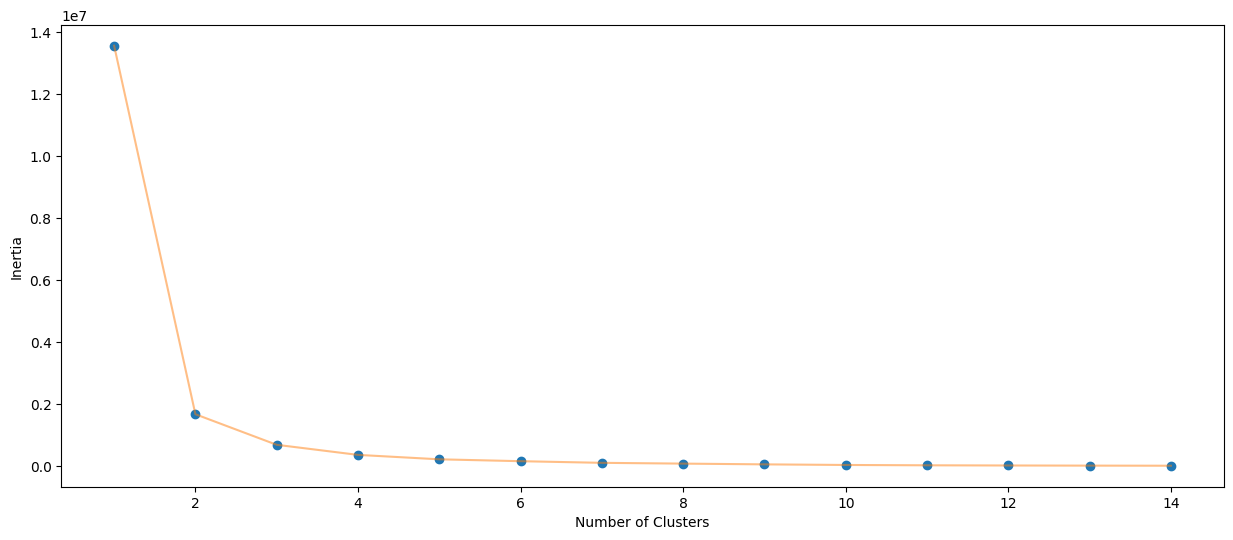

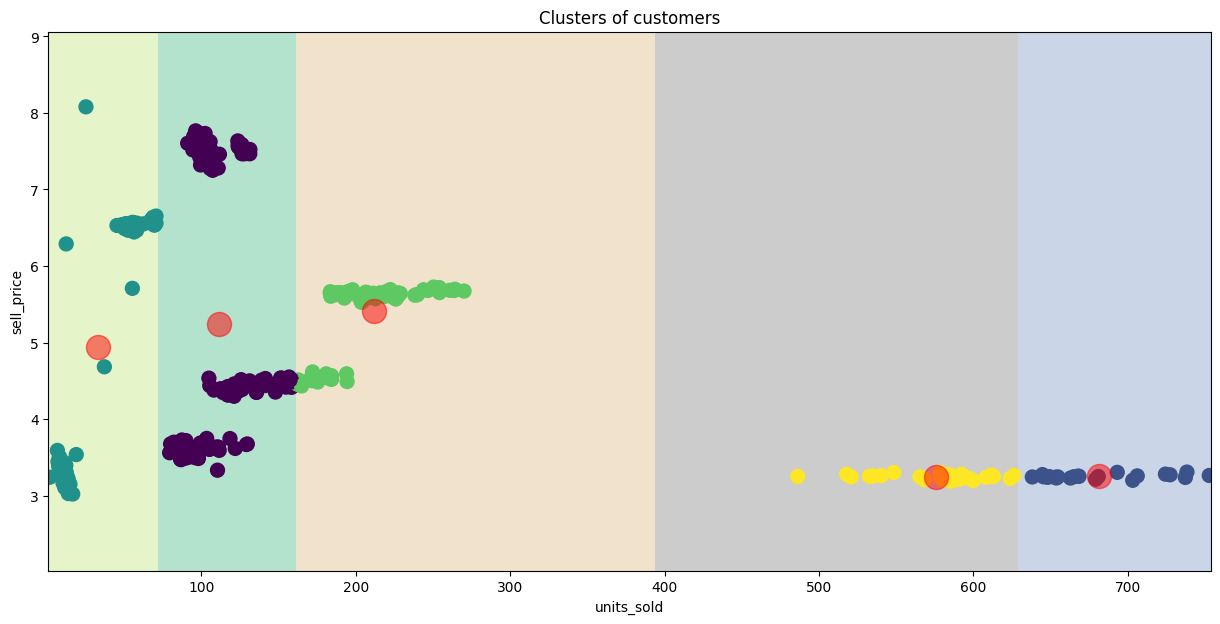

c:\Users\ermura\OneDrive - SAS\Documents\Nuclio Digital School\Entregaveis\Projeto Final\codes\src\agglomerative.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


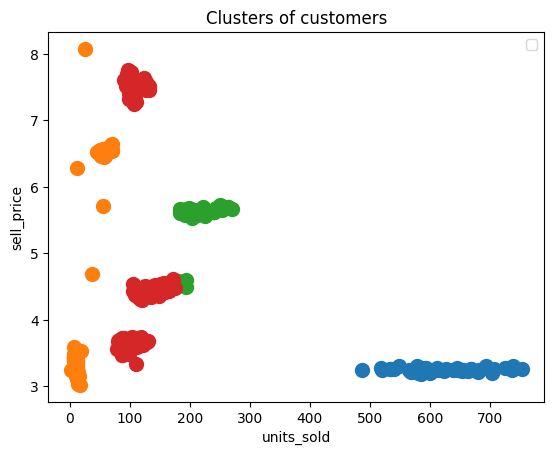

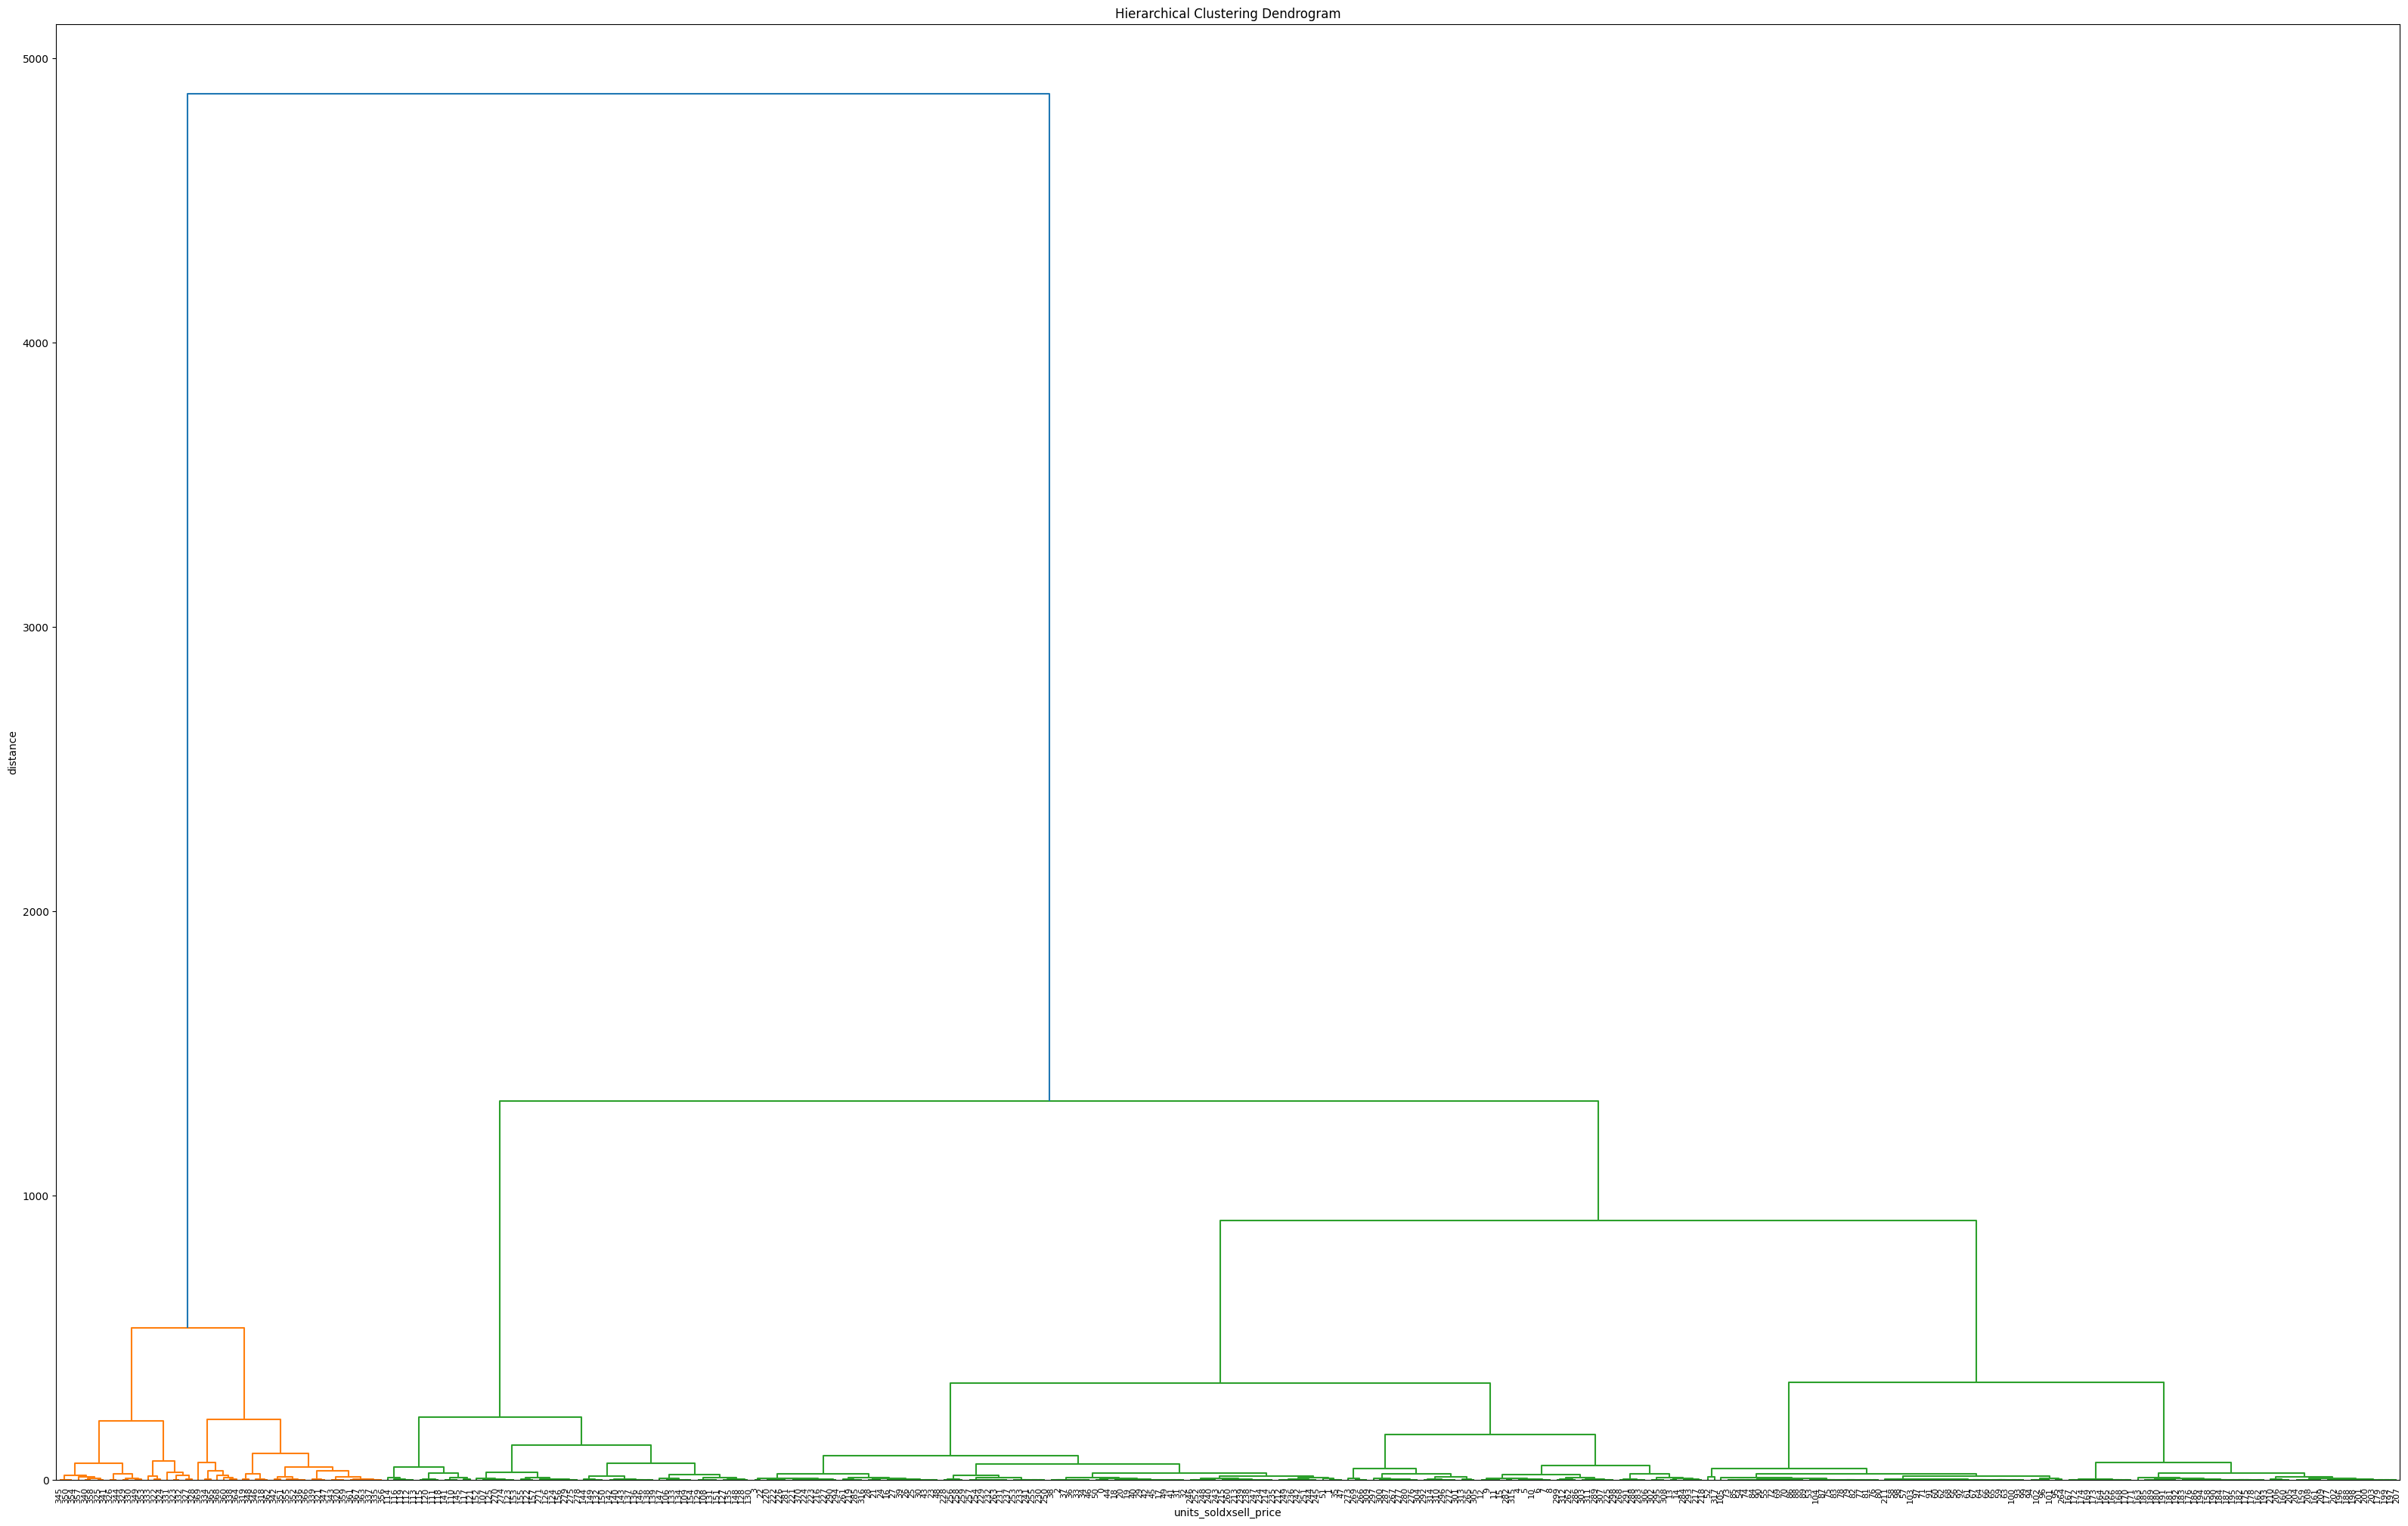

In [36]:
# Department x Week
df_sold_week_x_depart['units_sold']=df_sold_week_x_depart['units_sold']/1000 
scatter_plot2D(df_var=df_sold_week_x_depart, 
               x_var='units_sold', 
               y_var='sell_price', 
               x_label='units_sold', 
               y_label='sell_price')

elbowmethod(df_var=df_sold_week_x_depart, 
            x_var='units_sold', 
            y_var='sell_price')

kmeans_clust(df_var=df_sold_week_x_depart, 
            x_var='units_sold', 
            y_var='sell_price',
            nclust=5)

agglomerative_clust(df_var=df_sold_week_x_depart, 
                    x_var='units_sold', 
                    y_var='sell_price',
                    nclust=4)

dendograma(df_var=df_sold_week_x_depart, 
                    x_var='units_sold', 
                    y_var='sell_price')

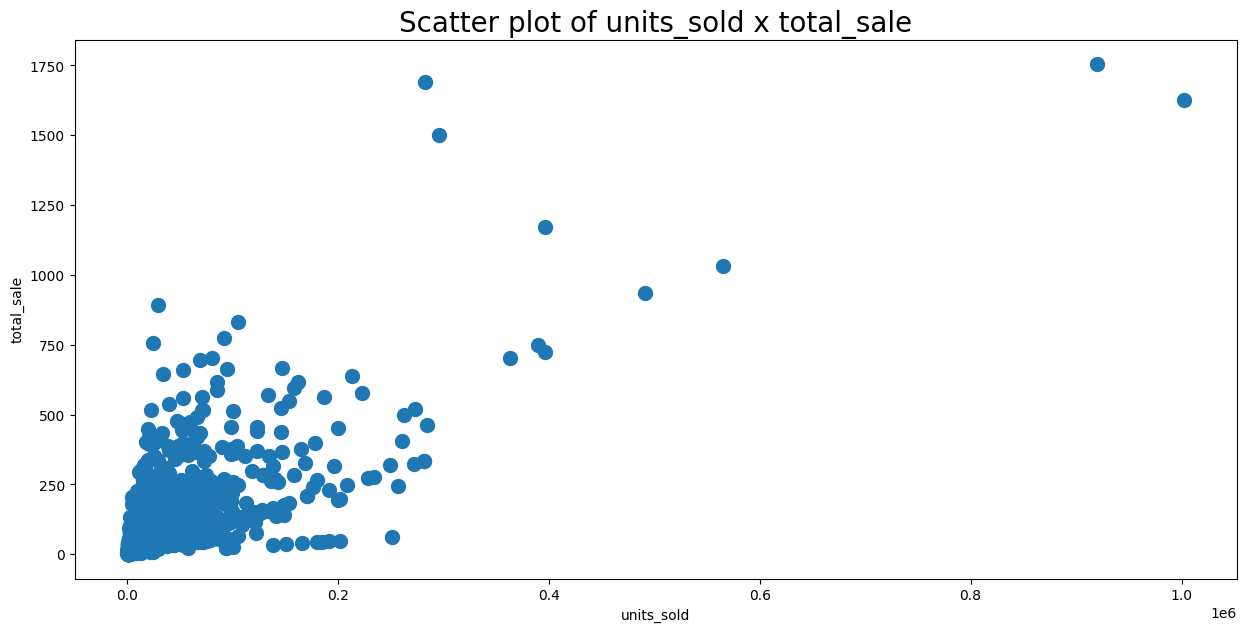

C:\Users\ermura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


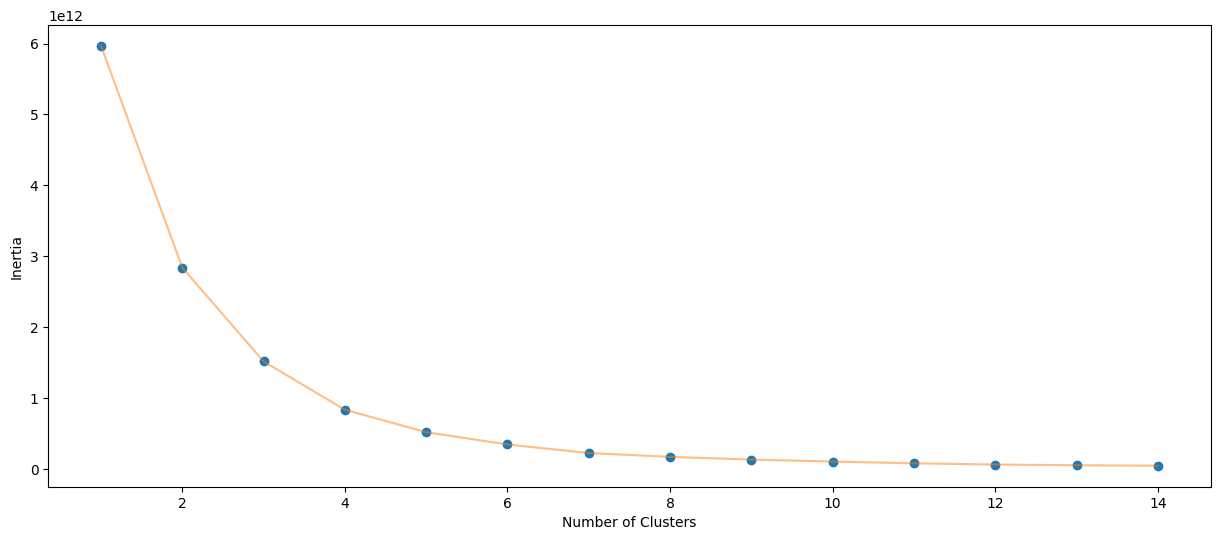

c:\Users\ermura\OneDrive - SAS\Documents\Nuclio Digital School\Entregaveis\Projeto Final\codes\src\agglomerative.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


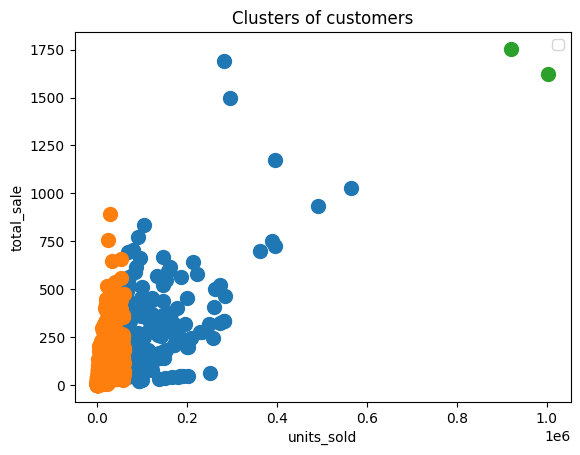

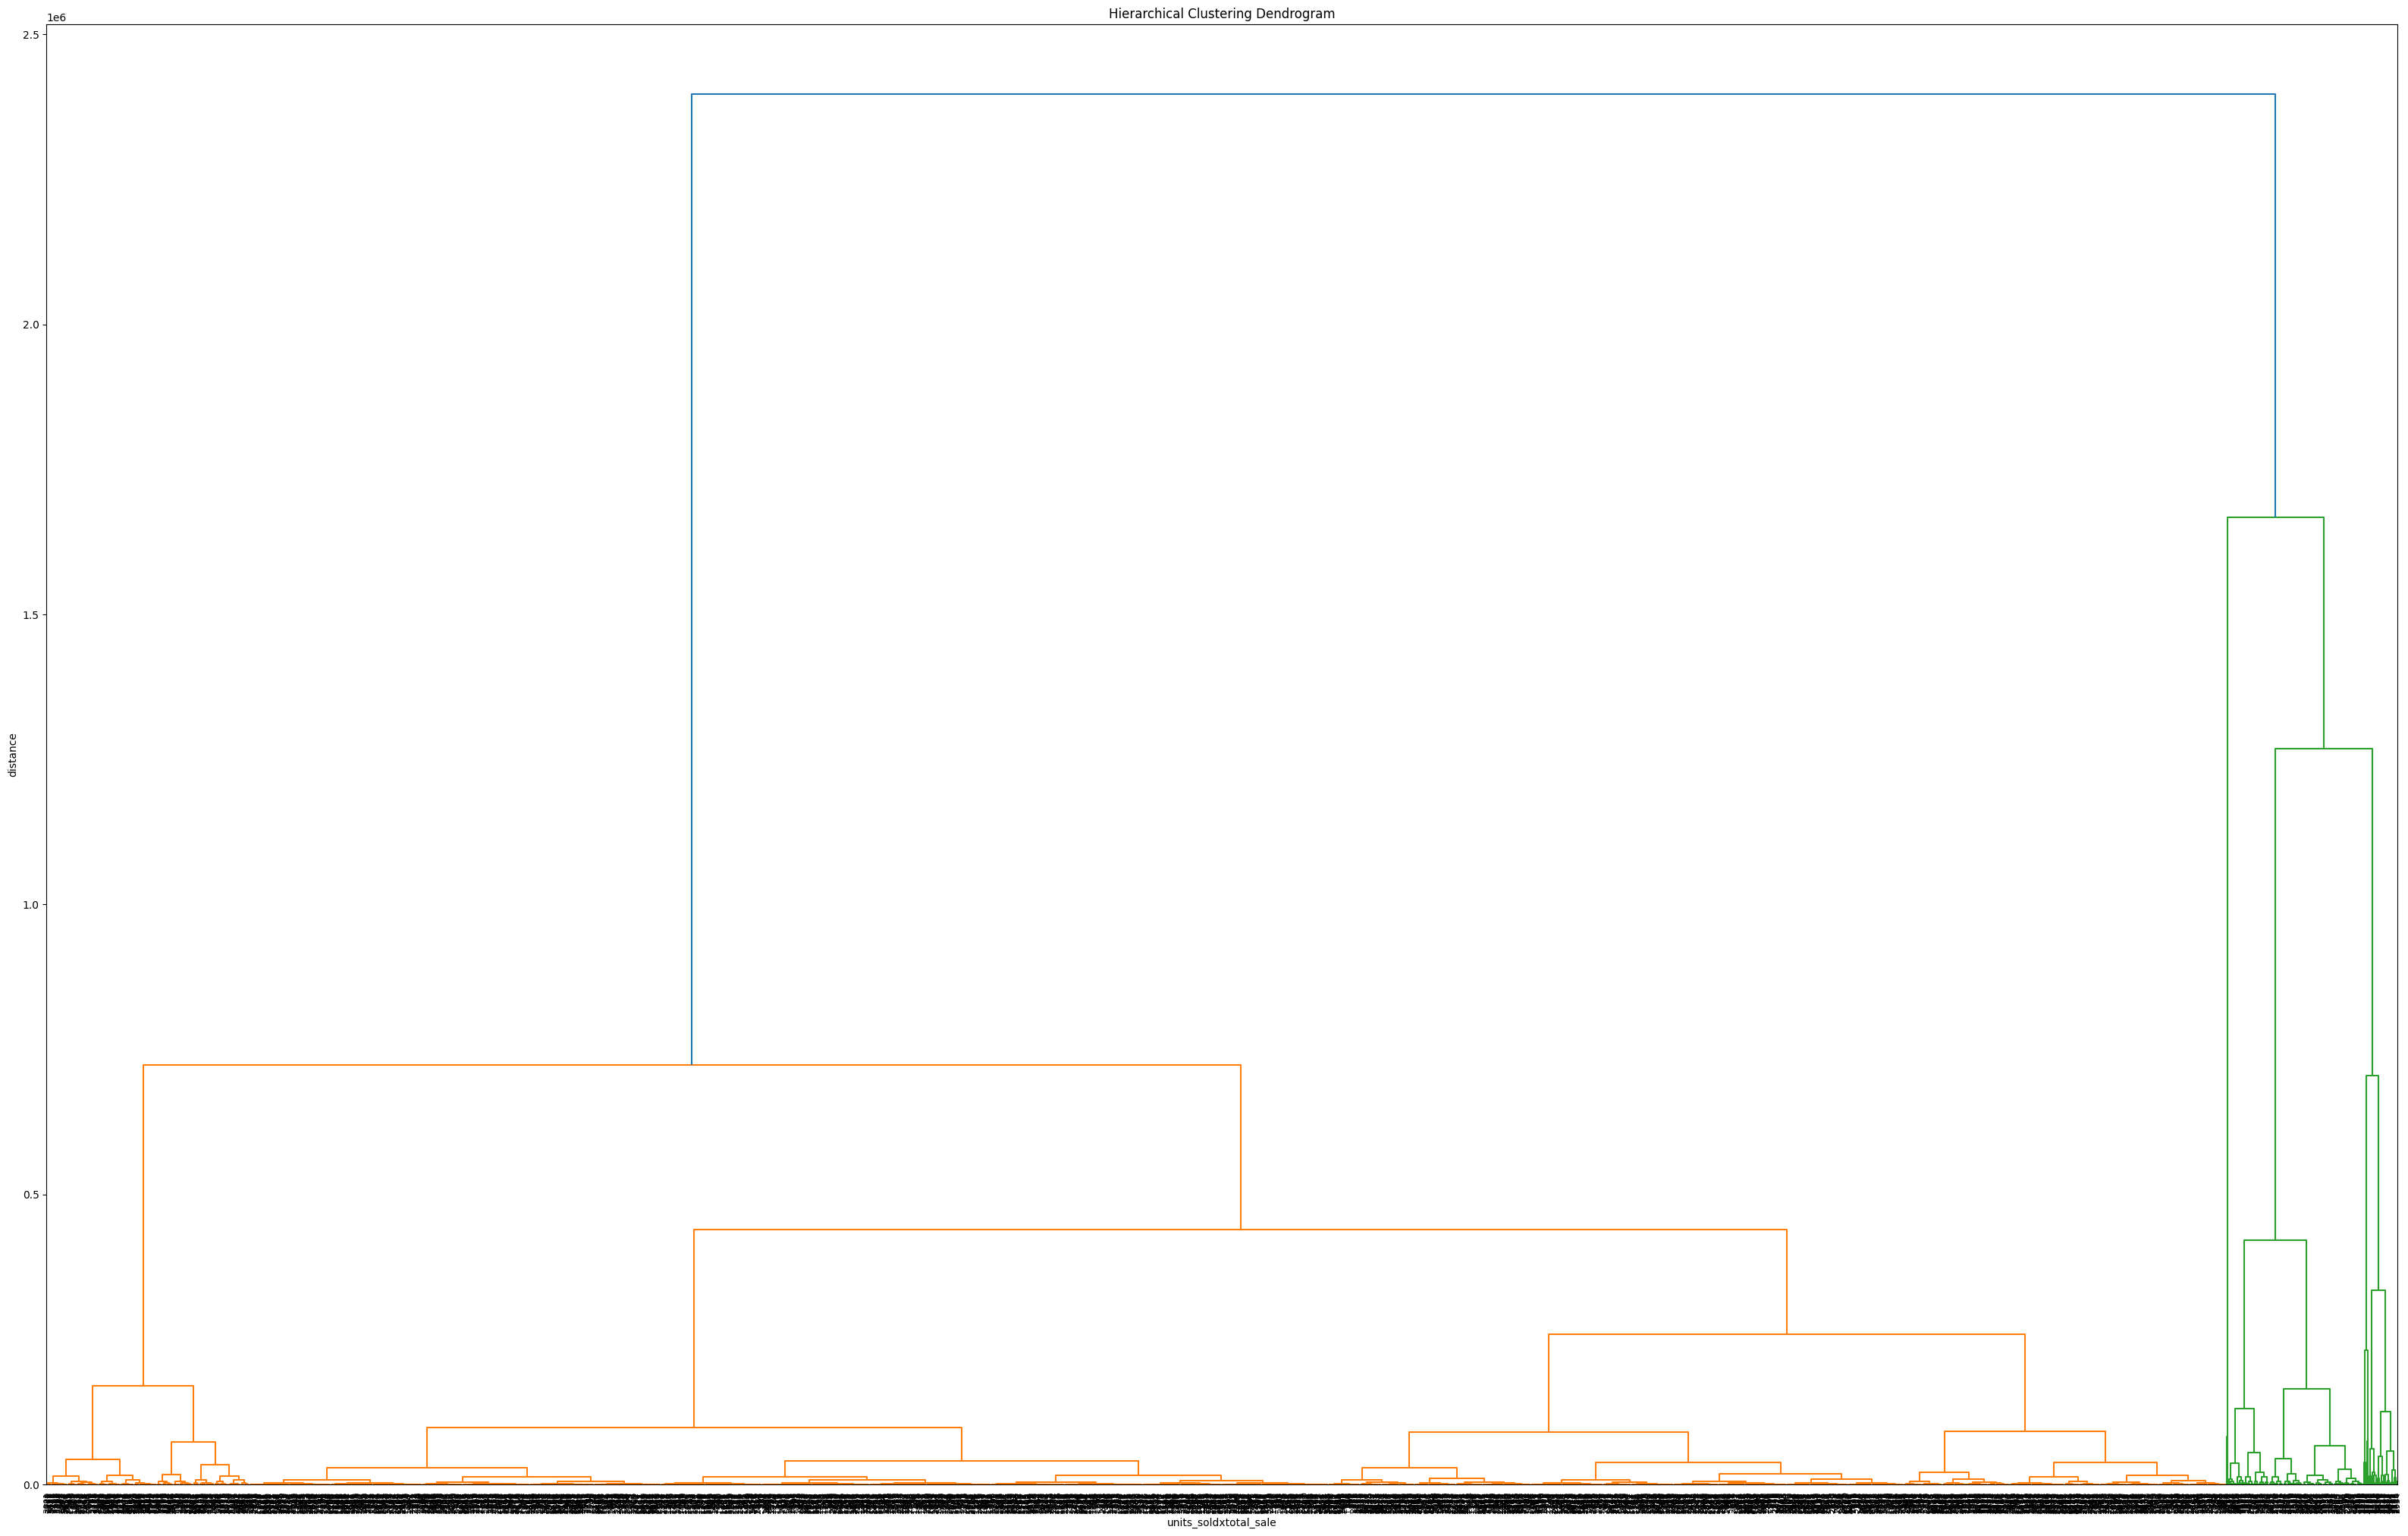

In [291]:
# Department x Week
scatter_plot2D(df_var=df_sold_week_x_store, 
               x_var='units_sold', 
               y_var='total_sale', 
               x_label='units_sold', 
               y_label='total_sale')

elbowmethod(df_var=df_sold_week_x_store, 
            x_var='units_sold', 
            y_var='total_sale')

# kmeans_clust(df_var=df_sold_week_x_store, 
#             x_var='units_sold', 
#             y_var='total_sale',
#             nclust=3)

agglomerative_clust(df_var=df_sold_week_x_store, 
                    x_var='units_sold', 
                    y_var='total_sale',
                    nclust=3)

dendograma(df_var=df_sold_week_x_store, 
                    x_var='units_sold', 
                    y_var='total_sale')